<a href="https://colab.research.google.com/github/jeffersonsps61/Flow-Stress-Analisys-INCONEL-625/blob/main/Flow_Stress_Analisys_INCONEL_625.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
flow_10 = pd.read_table('https://raw.githubusercontent.com/jeffersonsps61/Flow-Stress-Analisys-INCONEL-625/refs/heads/main/FLOW%20STRESS%20INCONEL%20625%20STRAIN%20RATE%2010.0.dat',
                        skiprows=[0])
flow_10

,'Temp','700.0 (C)','750.0 (C)','800.0 (C)','850.0 (C)','900.0 (C)','950.0 (C)','1000.0 (C)','1050.0 (C)','1100.0 (C)','1150.0 (C)','1200.0 (C)','1250.0 (C)'
0,0.00,282.8550,280.9170,279.1890,277.6400,276.2420,274.9750,273.8220,272.7670,235.7581,178.1445,136.1589,104.6606
1,0.02,415.7578,401.5392,387.5036,372.3298,356.8663,341.1866,325.3676,309.4863,235.7580,178.1444,136.1588,104.6605
2,0.04,466.8697,447.1289,427.1660,406.3412,385.2229,363.9492,342.6584,315.8884,235.7558,178.1428,136.1575,104.6595
3,0.06,499.6336,476.1604,452.3109,427.7211,402.8833,377.9836,353.2037,315.8756,235.7462,178.1357,136.1521,104.6553
4,0.08,524.2651,497.8948,471.0695,443.5871,415.9139,388.2743,360.8842,315.8413,235.7207,178.1167,136.1377,104.6438
...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,3.60,991.0479,898.7386,807.5800,718.9853,634.1904,466.6674,338.1505,248.8364,185.7026,140.3090,107.2323,82.4014
57,3.70,995.6005,902.5672,810.7213,721.4902,636.1198,465.3172,337.1714,248.1181,185.1704,139.9214,106.9442,82.1801
58,3.80,1000.0518,906.3094,813.7907,723.9367,638.0035,464.0130,336.2192,247.4092,184.6409,139.5047,106.6134,81.9777
59,3.90,1004.4065,909.9693,816.7914,726.3277,639.8435,462.7308,335.2931,246.7326,184.1423,139.1363,106.3209,81.7166


In [14]:
flow_10.rename(columns={"'Temp'":'True Strain',
                        "'700.0 (C)'":'700 [°C]',
                        "'750.0 (C)'":'750 [°C]',
                        "'800.0 (C)'":'800 [°C]',
                        "'850.0 (C)'":'850 [°C]',
                        "'900.0 (C)'":'900 [°C]',
                        "'1000.0 (C)'":'1000 [°C]',
                        "'1050.0 (C)'":'1050 [°C]',
                        "'1100.0 (C)'":'1100 [°C]',
                        "'1150.0 (C)'":'1150 [°C]',
                        "'1200.0 (C)'":'1200 [°C]',
                        "'1250.0 (C)'":'1250 [°C]',
                        "'950.0 (C)'":'950 [°C]',}, inplace=True)

In [15]:
flow_1 = pd.read_table('https://raw.githubusercontent.com/jeffersonsps61/Flow-Stress-Analisys-INCONEL-625/refs/heads/main/FLOW%20STRESS%20INCONEL%20625%20STRAIN%20RATE%201.0.dat',
                       skiprows=[0])
flow_1

,'Temp','700.0 (C)','750.0 (C)','800.0 (C)','850.0 (C)','900.0 (C)','950.0 (C)','1000.0 (C)','1050.0 (C)','1100.0 (C)','1150.0 (C)','1200.0 (C)','1250.0 (C)'
0,0.00,276.4160,274.5230,272.8340,271.3200,269.9540,268.7160,267.5890,230.4841,172.0198,129.9824,99.3420,76.3598
1,0.02,407.3564,394.2411,379.6236,364.6613,349.4170,333.9628,313.2086,230.4840,172.0197,129.9823,99.3419,76.3598
2,0.04,457.7954,438.8227,418.6931,398.1522,377.3287,356.3592,313.2055,230.4817,172.0180,129.9810,99.3409,76.3590
3,0.06,490.1479,467.3355,443.4879,419.2260,394.7290,370.1808,313.1921,230.4717,172.0107,129.9752,99.3366,76.3557
4,0.08,514.4797,488.7210,461.9952,434.8728,407.5738,380.3199,313.1529,230.4426,171.9890,129.9585,99.3241,76.3460
...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,3.60,976.7603,885.2009,794.8310,675.7333,476.0522,339.8354,246.2396,181.1986,135.2229,102.1699,78.0902,60.0325
57,3.70,981.2777,888.9970,797.9434,673.7774,474.6678,338.8520,245.5223,180.6690,134.8379,101.8835,77.8605,59.8348
58,3.80,985.6948,892.7075,800.9846,671.8778,473.3286,337.8974,244.8377,180.1659,134.4422,101.5715,77.6144,59.6385
59,3.90,990.0162,896.3365,803.9579,670.0316,472.0332,336.9713,244.1635,179.6632,134.0924,101.2957,77.3968,59.4648


In [16]:
flow_1.rename(columns={"'Temp'":'True Strain',
                        "'700.0 (C)'":'700 [°C]',
                        "'750.0 (C)'":'750 [°C]',
                        "'800.0 (C)'":'800 [°C]',
                        "'850.0 (C)'":'850 [°C]',
                        "'900.0 (C)'":'900 [°C]',
                        "'1000.0 (C)'":'1000 [°C]',
                        "'1050.0 (C)'":'1050 [°C]',
                        "'1100.0 (C)'":'1100 [°C]',
                        "'1150.0 (C)'":'1150 [°C]',
                        "'1200.0 (C)'":'1200 [°C]',
                        "'1250.0 (C)'":'1250 [°C]',
                        "'950.0 (C)'":'950 [°C]',}, inplace=True)

In [17]:
flow_0_1 = pd.read_table('https://raw.githubusercontent.com/jeffersonsps61/Flow-Stress-Analisys-INCONEL-625/refs/heads/main/FLOW%20STRESS%20INCONEL%20625%20STRAIN%20RATE%200.1.dat',
                         skiprows=[0])
flow_0_1

,'Temp','150.0 (C)','700.0 (C)','750.0 (C)','800.0 (C)','850.0 (C)','900.0 (C)','950.0 (C)','1000.0 (C)','1050.0 (C)','1100.0 (C)','1150.0 (C)','1200.0 (C)','1250.0 (C)'
0,0.00,333.7300,270.1240,268.2740,266.6240,265.1440,263.8090,262.5990,228.5273,168.1701,125.5064,94.8361,72.4782,55.7106
1,0.02,542.6737,399.1084,386.3021,371.8897,357.1385,342.1125,315.3823,228.5271,168.1700,125.5063,94.8360,72.4781,55.7106
2,0.04,628.2021,448.8733,430.2251,410.3691,390.1116,369.5823,315.3789,228.5246,168.1682,125.5050,94.8350,72.4774,55.7100
3,0.06,684.3526,480.8129,458.3462,434.8141,410.8800,386.7235,315.3611,228.5117,168.1588,125.4978,94.8294,72.4732,55.7067
4,0.08,727.2101,504.8433,479.4494,453.0700,426.3078,399.3828,315.3251,228.4855,168.1397,125.4833,94.8183,72.4647,55.6999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,3.60,1624.5201,962.5468,871.7454,664.3201,464.4967,327.2340,233.5979,169.2632,124.5484,92.9647,70.2252,53.6561,41.2284
57,3.70,1633.9453,967.0282,875.5084,660.8090,462.0460,325.5028,232.3634,168.3665,123.9019,92.4519,69.8631,53.3685,41.0420
58,3.80,1643.1718,971.4100,879.1867,657.4053,459.6630,323.8293,231.1701,167.4985,123.2556,92.0002,69.4850,53.1151,40.8093
59,3.90,1652.2086,975.6971,882.7842,654.1070,457.3548,322.2028,230.0147,166.6588,122.6341,91.5135,69.1508,52.8467,40.5827


In [18]:
flow_0_1.rename(columns={"'Temp'":'True Strain',
                        "'700.0 (C)'":'700 [°C]',
                        "'750.0 (C)'":'750 [°C]',
                        "'800.0 (C)'":'800 [°C]',
                        "'850.0 (C)'":'850 [°C]',
                        "'900.0 (C)'":'900 [°C]',
                        "'1000.0 (C)'":'1000 [°C]',
                        "'1050.0 (C)'":'1050 [°C]',
                        "'1100.0 (C)'":'1100 [°C]',
                        "'1150.0 (C)'":'1150 [°C]',
                        "'1200.0 (C)'":'1200 [°C]',
                        "'1250.0 (C)'":'1250 [°C]',
                        "'950.0 (C)'":'950 [°C]',}, inplace=True)

In [19]:
flow_10.columns

Index(['True Strain', '700 [°C]', '750 [°C]', '800 [°C]', '850 [°C]',
       '900 [°C]', '950 [°C]', '1000 [°C]', '1050 [°C]', '1100 [°C]',
       '1150 [°C]', '1200 [°C]', '1250 [°C]'],
      dtype='object')

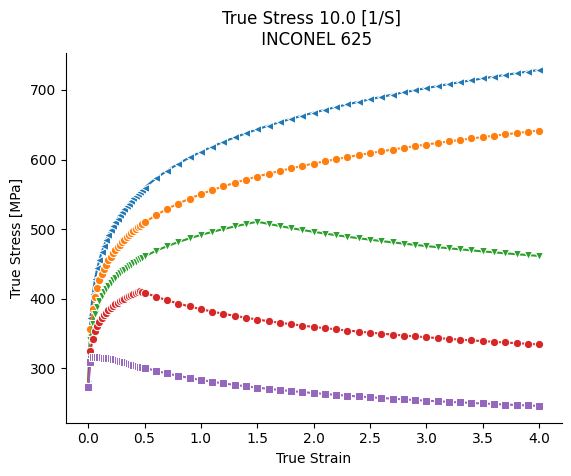

In [20]:
sns.lineplot(data=flow_10, x=flow_10['True Strain'], y=flow_10['850 [°C]'], marker = '<')
sns.lineplot(data=flow_10, x=flow_10['True Strain'], y=flow_10['900 [°C]'], marker = 'o')
sns.lineplot(data=flow_10, x=flow_10['True Strain'], y=flow_10['950 [°C]'], marker = 'v')
sns.lineplot(data=flow_10, x=flow_10['True Strain'], y=flow_10['1000 [°C]'], marker = 'o')
sns.lineplot(data=flow_10, x=flow_10['True Strain'], y=flow_10['1050 [°C]'], marker = 's')


plt.title('True Stress 10.0 [1/S] \n INCONEL 625')
plt.ylabel('True Stress [MPa]')
plt.xlabel('True Strain')
#plt.legend(['900.0', '950.0', '1000.0'])
sns.despine()
#plt.grid()
plt.show()

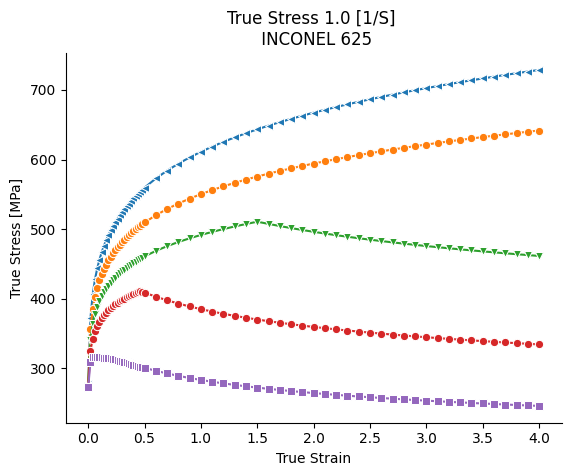

In [21]:
sns.lineplot(data=flow_1, x=flow_10['True Strain'], y=flow_10['850 [°C]'], marker = '<')
sns.lineplot(data=flow_1, x=flow_10['True Strain'], y=flow_10['900 [°C]'], marker = 'o')
sns.lineplot(data=flow_1, x=flow_10['True Strain'], y=flow_10['950 [°C]'], marker = 'v')
sns.lineplot(data=flow_1, x=flow_10['True Strain'], y=flow_10['1000 [°C]'], marker = 'o')
sns.lineplot(data=flow_1, x=flow_10['True Strain'], y=flow_10['1050 [°C]'], marker = 's')


plt.title('True Stress 1.0 [1/S] \n INCONEL 625')
plt.ylabel('True Stress [MPa]')
plt.xlabel('True Strain')

sns.despine()
#plt.grid()
plt.show()

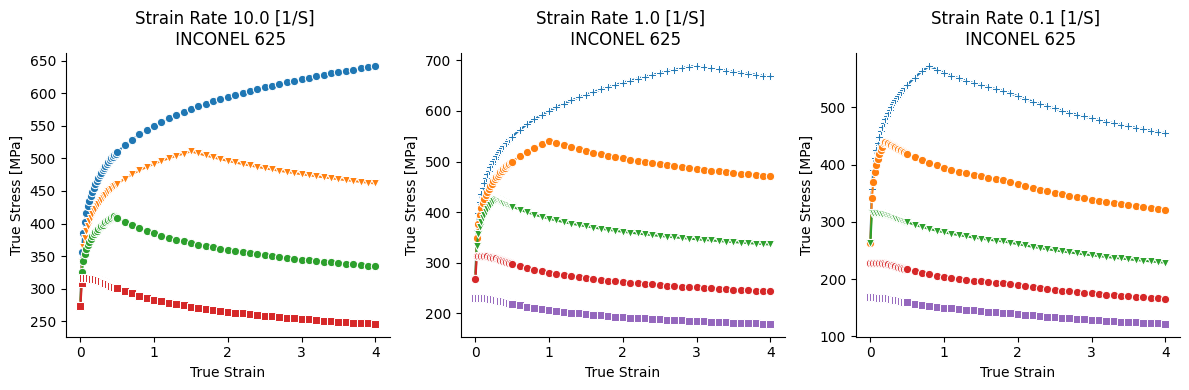

In [22]:
fig, ax = plt.subplots(1,3,figsize=(12,4))

#sns.lineplot(data=flow_10, x=flow_10['True Strain'], y=flow_10['850 [°C]'], marker = '<', ax=ax[0])
sns.lineplot(data=flow_10, x=flow_10['True Strain'], y=flow_10['900 [°C]'], marker = 'o',ax=ax[0])
sns.lineplot(data=flow_10, x=flow_10['True Strain'], y=flow_10['950 [°C]'], marker = 'v', ax=ax[0] )
sns.lineplot(data=flow_10, x=flow_10['True Strain'], y=flow_10['1000 [°C]'], marker = 'o', ax=ax[0])
sns.lineplot(data=flow_10, x=flow_10['True Strain'], y=flow_10['1050 [°C]'], marker = 's', ax=ax[0])

ax[0].set(title='Strain Rate 10.0 [1/S] \n INCONEL 625',
            ylabel='True Stress [MPa]',
            xlabel='True Strain')


sns.lineplot(data=flow_1, x=flow_1['True Strain'], y=flow_1['850 [°C]'], marker = 'P',ax=ax[1])
sns.lineplot(data=flow_1, x=flow_1['True Strain'], y=flow_1['900 [°C]'], marker = 'o',ax=ax[1])
sns.lineplot(data=flow_1, x=flow_1['True Strain'], y=flow_1['950 [°C]'], marker = 'v', ax=ax[1] )
sns.lineplot(data=flow_1, x=flow_1['True Strain'], y=flow_1['1000 [°C]'], marker = 'o', ax=ax[1])
sns.lineplot(data=flow_1, x=flow_1['True Strain'], y=flow_1['1050 [°C]'], marker = 's', ax=ax[1])

ax[1].set(title='Strain Rate 1.0 [1/S] \n INCONEL 625',
            ylabel='True Stress [MPa]',
            xlabel='True Strain')

sns.lineplot(data=flow_1, x=flow_0_1['True Strain'], y=flow_0_1['850 [°C]'], marker = 'P',ax=ax[2])
sns.lineplot(data=flow_1, x=flow_0_1['True Strain'], y=flow_0_1['900 [°C]'], marker = 'o',ax=ax[2])
sns.lineplot(data=flow_1, x=flow_0_1['True Strain'], y=flow_0_1['950 [°C]'], marker = 'v', ax=ax[2] )
sns.lineplot(data=flow_1, x=flow_0_1['True Strain'], y=flow_0_1['1000 [°C]'], marker = 'o', ax=ax[2])
sns.lineplot(data=flow_1, x=flow_0_1['True Strain'], y=flow_0_1['1050 [°C]'], marker = 's', ax=ax[2])

ax[2].set(title='Strain Rate 0.1 [1/S] \n INCONEL 625',
            ylabel='True Stress [MPa]',
            xlabel='True Strain')

#plt.legend()
plt.tight_layout()
sns.despine()
plt.show()

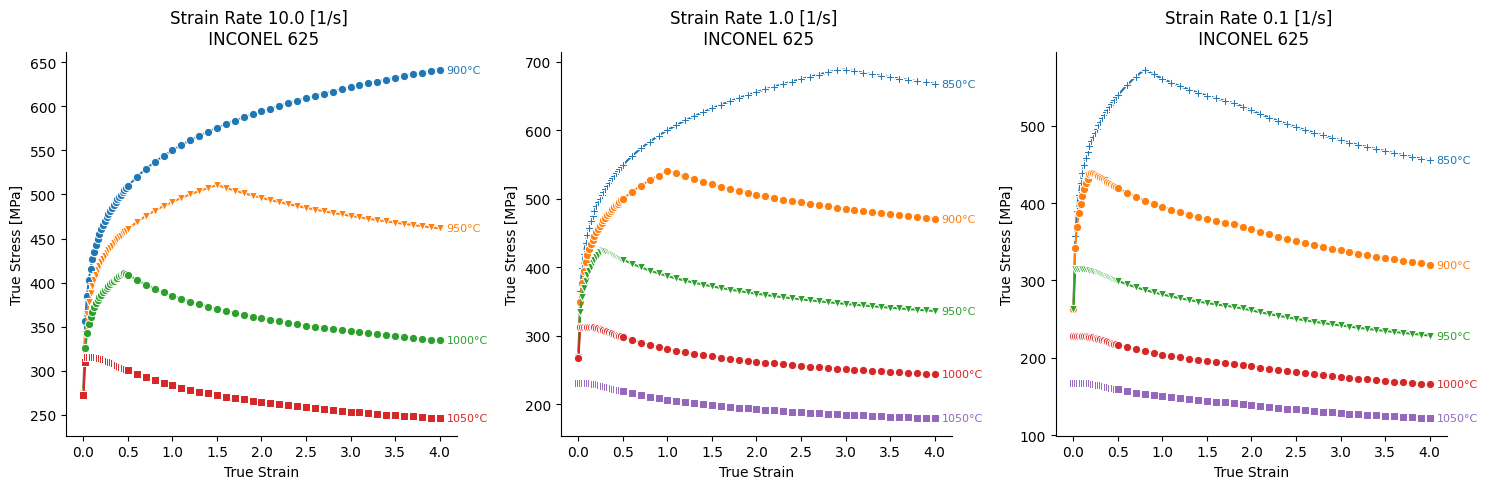

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
# Importar o numpy pode ser útil se precisar de manipulação de dados
# import numpy as np

# --- Configurações Comuns de Plotagem ---
# Lista de temperaturas para ax[0] (900 a 1050, pois 850 está comentado)
COLUNAS_T_10 = ['900 [°C]', '950 [°C]', '1000 [°C]', '1050 [°C]']
ROTULOS_T_10 = ['900°C', '950°C', '1000°C', '1050°C']
MARCADORES_10 = ['o', 'v', 'o', 's']

# Lista de temperaturas para ax[1] e ax[2] (850 a 1050)
COLUNAS_T_FULL = ['850 [°C]', '900 [°C]', '950 [°C]', '1000 [°C]', '1050 [°C]']
ROTULOS_T_FULL = ['850°C', '900°C', '950°C', '1000°C', '1050°C']
MARCADORES_FULL = ['P', 'o', 'v', 'o', 's']

def plot_and_annotate(data_frame, colunas_temp, rotulos_temp, marcadores, subplot_ax, title):
    """Função auxiliar para plotar as linhas e adicionar anotações."""

    # Plota as linhas
    for i, (col, rotulo, marker) in enumerate(zip(colunas_temp, rotulos_temp, marcadores)):
        sns.lineplot(data=data_frame, x=data_frame['True Strain'], y=data_frame[col],
                     marker=marker, ax=subplot_ax, label=rotulo)

    # Configura os títulos e rótulos
    subplot_ax.set(title=title,
                   ylabel='True Stress [MPa]',
                   xlabel='True Strain')

    # Adiciona as anotações no final das linhas
    for i, (col, rotulo) in enumerate(zip(colunas_temp, rotulos_temp)):
        try:
            # Pega a cor da linha recém-plotada
            cor_linha = subplot_ax.lines[i].get_color()

            # Pega o último ponto válido para anotação
            # Usando .dropna() para garantir que não tentemos plotar NaN
            data_valid = data_frame[['True Strain', col]].dropna()
            if not data_valid.empty:
                ultimo_x = data_valid['True Strain'].iloc[-1]
                ultimo_y = data_valid[col].iloc[-1]
            else:
                continue # Pula a anotação se não houver dados válidos

            subplot_ax.annotate(
                rotulo,
                xy=(ultimo_x, ultimo_y),
                xytext=(5, 0),
                textcoords='offset points',
                ha='left',
                va='center',
                fontsize=8,
                color=cor_linha
            )
        except IndexError:
            # Pode acontecer se o número de linhas plotadas não corresponder
            # ao número de itens em 'colunas_temp' (raro, mas seguro)
            print(f"Aviso: Não foi possível anotar a linha {rotulo} em {title}")

    # Remove a legenda convencional (já que estamos usando anotações)
    if subplot_ax.get_legend():
        subplot_ax.get_legend().remove()


# Cria a figura e os eixos
fig, ax = plt.subplots(1, 3, figsize=(15, 5)) # Aumentei um pouco a largura para caber 3 plots

# ----------------------------------------------------
# 1. Plot para ax[0]: Strain Rate 10.0 [1/S] (flow_10)
# ----------------------------------------------------
plot_and_annotate(
    data_frame=flow_10,
    colunas_temp=COLUNAS_T_10,
    rotulos_temp=ROTULOS_T_10,
    marcadores=MARCADORES_10,
    subplot_ax=ax[0],
    title='Strain Rate 10.0 [1/s] \n INCONEL 625'
)

# ----------------------------------------------------
# 2. Plot para ax[1]: Strain Rate 1.0 [1/S] (flow_1)
# ----------------------------------------------------
plot_and_annotate(
    data_frame=flow_1,
    colunas_temp=COLUNAS_T_FULL,
    rotulos_temp=ROTULOS_T_FULL,
    marcadores=MARCADORES_FULL,
    subplot_ax=ax[1],
    title='Strain Rate 1.0 [1/s] \n INCONEL 625'
)

# ----------------------------------------------------
# 3. Plot para ax[2]: Strain Rate 0.1 [1/S] (flow_0_1)
# ----------------------------------------------------
# **CORRIGIDO**: Assumindo que o DataFrame para 0.1/S é 'flow_0_1'
plot_and_annotate(
    data_frame=flow_0_1,
    colunas_temp=COLUNAS_T_FULL,
    rotulos_temp=ROTULOS_T_FULL,
    marcadores=MARCADORES_FULL,
    subplot_ax=ax[2],
    title='Strain Rate 0.1 [1/s] \n INCONEL 625'
)

# --- Finalização do Gráfico ---
plt.tight_layout()
sns.despine()
plt.show()